In [1]:
from setup_fitting import load_data, init_optimize_df, infer_signal, const_params, var_params, stratifiers, param_bounds, ABUNDANCE_COLS, AFFINITY_COLS, RCPS
from fit import fit
import seaborn as sns
import matplotlib.pyplot as plt

df = load_data()
df

,Tube #,Donor,Incubation time (hr),Cells,Cetuximab Variant,Cetuximab Concentration (ug/ml),Cytokine,Response
0,10,2,2,NK cells + A549,-,0,IFN-γ,193.395592
1,11,2,2,NK cells + A549,WT,0.01,IFN-γ,661.843404
2,12,2,2,NK cells + A549,G236A,0.01,IFN-γ,483.266052
3,13,2,2,NK cells + A549,A330L I332E,0.01,IFN-γ,2519.892383
4,14,2,2,NK cells + A549,G236A A330L I332E,0.01,IFN-γ,2844.571776
...,...,...,...,...,...,...,...,...
463,58,2,4,NK cells only,-,-,MIP-1β,189.468948
464,273,4,2,NK cells only,-,-,MIP-1β,87.775258
465,275,4,4,NK cells only,-,-,MIP-1β,146.350116
466,368,5,2,NK cells only,-,-,MIP-1β,140.994530


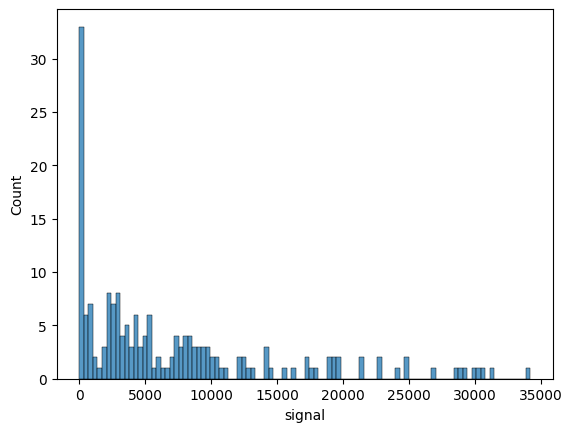

In [2]:
opt_df = init_optimize_df(df)
opt_df

# plot the distribution of the signal
sns.histplot(opt_df["signal"], bins=100)
plt.show()

In [3]:
result = fit(opt_df, const_params, var_params, stratifiers, param_bounds, infer_signal)
result

Fitting 8 parameters with 184 points.
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0036e+10                                    6.73e+09    
       1              3         6.7917e+09      3.24e+09       1.60e+00       2.87e+10    
       2              4         3.3158e+09      3.48e+09       2.35e+00       2.78e+10    
       3              6         3.2530e+09      6.28e+07       1.03e+00       9.12e+09    
       4              7         3.2161e+09      3.69e+07       3.07e-01       2.77e+08    
       5              8         3.2132e+09      2.93e+06       9.32e-01       1.04e+09    
       6             10         3.2120e+09      1.17e+06       2.17e-01       1.60e+08    
       7             11         3.2101e+09      1.90e+06       4.22e-01       6.36e+08    
       8             12         3.2100e+09      8.25e+04       8.20e-01       1.88e+09    
       9             13         3.2056e+09      4.41

,conc,log_KxStar,signal,log_aff_FcgRIIA-131R,log_aff_FcgRIIB,log_aff_FcgRIIIA-158V,log_aff_FcgRIIIB,donor,time,variant,...,Tube #,log_rbound_signal_coeff,log_abund_FcgRIIA-131R,log_abund_FcgRIIB,log_abund_FcgRIIIA-158V,log_abund_FcgRIIIB,ab_ag_coefficient,log_eff_cancer_cell_conc,signal_inferred,se
0,1.0,-12.0,139.882731,5.809560,5.598791,5.530200,5.530200,2,2,WT,...,11,-1.741792,1.698825,7.248453,5.198169,3.850831,14.999839,-15.604137,1411.840389,1.617876e+06
1,1.0,-12.0,0.000000,6.777427,5.434569,5.749736,5.749736,2,2,G236A,...,12,-1.741792,1.698825,7.248453,5.198169,3.850831,14.999839,-15.604137,1494.765650,2.234324e+06
2,1.0,-12.0,1997.931710,5.895975,5.630428,6.262451,6.262451,2,2,A330L I332E,...,13,-1.741792,1.698825,7.248453,5.198169,3.850831,14.999839,-15.604137,2425.682031,1.829703e+05
3,1.0,-12.0,2322.611103,5.895975,6.133539,7.000000,7.000000,2,2,G236A A330L I332E,...,14,-1.741792,1.698825,7.248453,5.198169,3.850831,14.999839,-15.604137,2797.287732,2.253179e+05
4,100.0,-12.0,842.437412,5.809560,5.598791,5.530200,5.530200,2,2,WT,...,15,-1.741792,1.698825,7.248453,5.198169,3.850831,14.999839,-15.604137,2853.132683,4.042895e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1.0,-12.0,22769.160337,5.895975,6.133539,7.000000,7.000000,5,4,G236A A330L I332E,...,343,-1.042980,1.698825,7.248453,5.198169,3.850831,14.999839,-15.604137,13981.340514,7.722578e+07
180,100.0,-12.0,14093.218782,5.809560,5.598791,5.530200,5.530200,5,4,WT,...,344,-1.042980,1.698825,7.248453,5.198169,3.850831,14.999839,-15.604137,14260.463492,2.797079e+04
181,100.0,-12.0,9062.187704,6.777427,5.434569,5.749736,5.749736,5,4,G236A,...,345,-1.042980,1.698825,7.248453,5.198169,3.850831,14.999839,-15.604137,14274.189843,2.716497e+07
182,100.0,-12.0,26725.416395,5.895975,5.630428,6.262451,6.262451,5,4,A330L I332E,...,346,-1.042980,1.698825,7.248453,5.198169,3.850831,14.999839,-15.604137,14288.716352,1.546715e+08


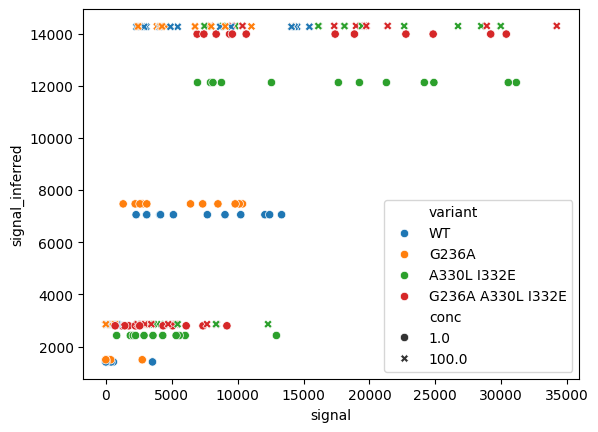

In [4]:
# plot signal vs inferred signal
sns.scatterplot(x="signal", y="signal_inferred", data=result, hue="variant", style="conc")
plt.show()

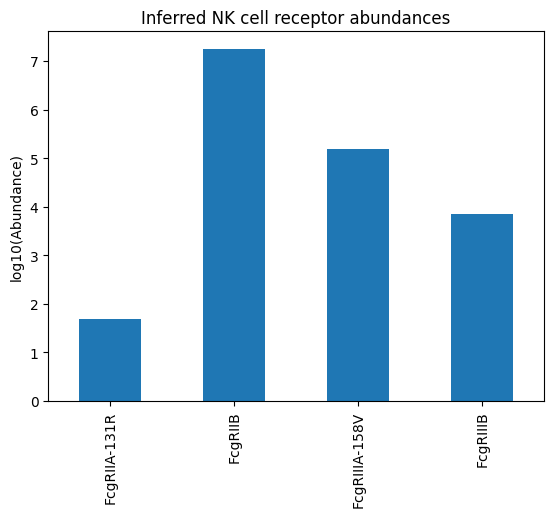

In [8]:
# assert abundances in each row are equal
assert result[ABUNDANCE_COLS].iloc[0].equals(result[ABUNDANCE_COLS].iloc[1])
# plot abundances as barplot
abundances = result[ABUNDANCE_COLS].iloc[0]
# rename abundances to receptor names
abundances.rename(index={abund: rcp for abund, rcp in zip(ABUNDANCE_COLS, RCPS)}, inplace=True)
# plot
ax = abundances.plot(kind="bar")
ax.set_ylabel("log10(Abundance)")
ax.set_title("Inferred NK cell receptor abundances")
plt.show()

Text(0.5, 1.0, 'Affinities by variant (not fit)')

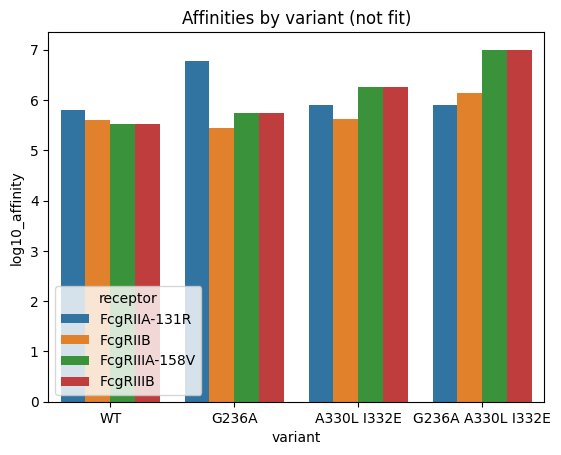

In [9]:
# plot affinities by variant, requiring melt
affinities = result[AFFINITY_COLS + ["variant"]]
affinities_melted = affinities.melt(id_vars=["variant"], value_vars=AFFINITY_COLS, var_name="receptor", value_name="log10_affinity")
# rename columns to receptor names
affinities_melted.replace({aff: rcp for aff, rcp in zip(AFFINITY_COLS, RCPS)}, inplace=True)
ax = sns.barplot(x="variant", y="log10_affinity", hue="receptor", data=affinities_melted)
ax.set_title("Affinities by variant (not fit)")

In [11]:
print("log10 Effective cancer cell concentration: ", result["log_eff_cancer_cell_conc"].iloc[0])
print("ab_ag_coefficient: ", result["ab_ag_coefficient"].iloc[0])

log10 Effective cancer cell concentration:  -15.604136841761497
ab_ag_coefficient:  14.999838766773149
